In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns

In [3]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.head(), data.tail(), data.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  121

In [5]:
print(data.columns)
print(data.info())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
print(data.isnull().sum()) 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [33]:
data.smoker = [1 if x == 'yes' else 0 for x in data.smoker]
data.sex = [1 if x == 'male' else 0 for x in data.sex]


In [34]:
data.region = pd.get_dummies(data.region)
data.charges = pd.to_numeric(data.charges)
data.columns.values

ValueError: Columns must be same length as key

# Data Visualization

Text(0.5, 1.0, 'Distribution of charges values :')

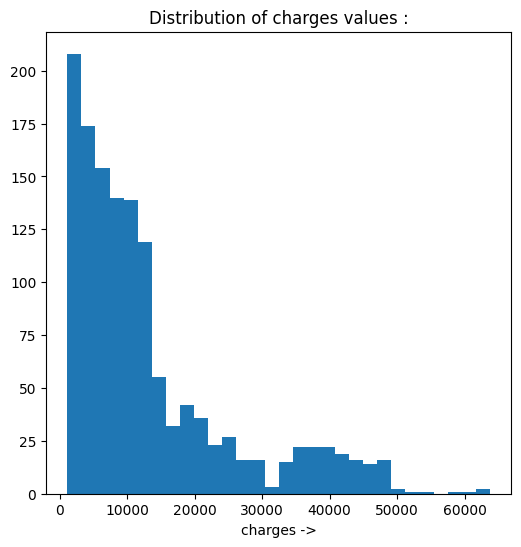

In [12]:
plt.figure(figsize=(6,6))
plt.hist(data.charges, bins='auto')
plt.xlabel("charges ->")
plt.title("Distribution of charges values :")

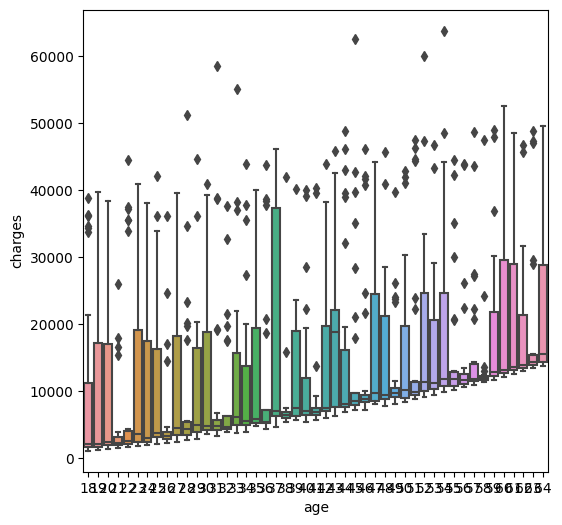

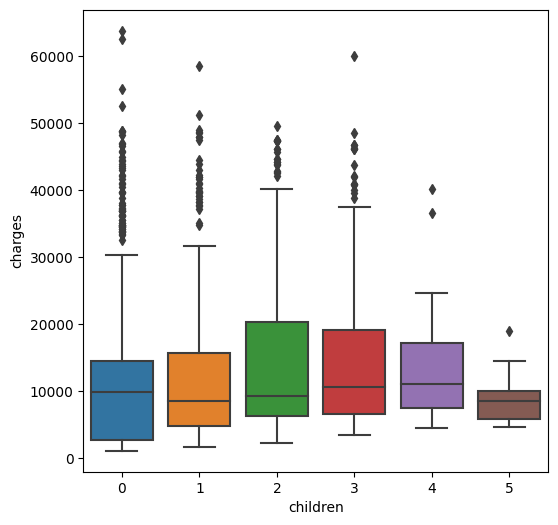

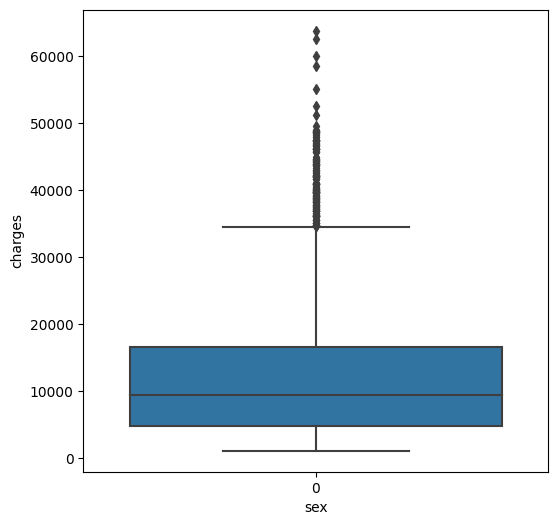

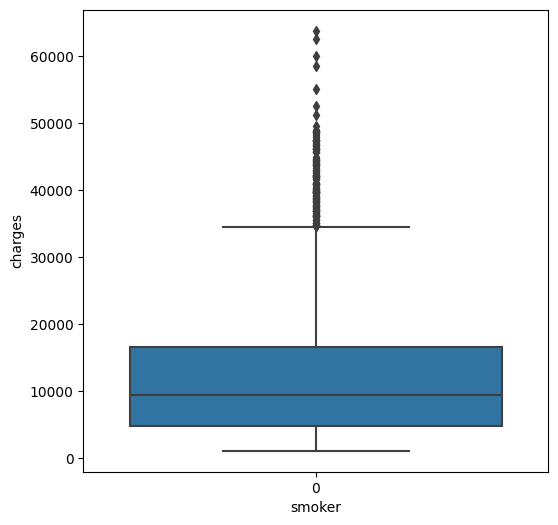

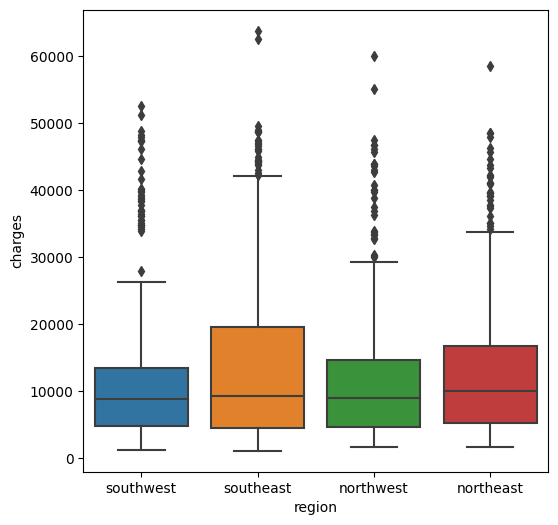

In [13]:
cols = ['age', 'children', 'sex', 'smoker', 'region']
for col in cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(x = data[col], y = data['charges'])

In [14]:
data.corr()

C:\Users\Caleb\AppData\Local\Temp\ipykernel_10520\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,sex,bmi,children,smoker,charges
age,1.000000,NaN,0.109272,0.042469,NaN,0.299008
sex,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.109272,NaN,1.000000,0.012759,NaN,0.198341
children,0.042469,NaN,0.012759,1.000000,NaN,0.067998
smoker,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.299008,NaN,0.198341,0.067998,NaN,1.000000


C:\Users\Caleb\AppData\Local\Temp\ipykernel_10520\615114949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square = True)


<AxesSubplot: >

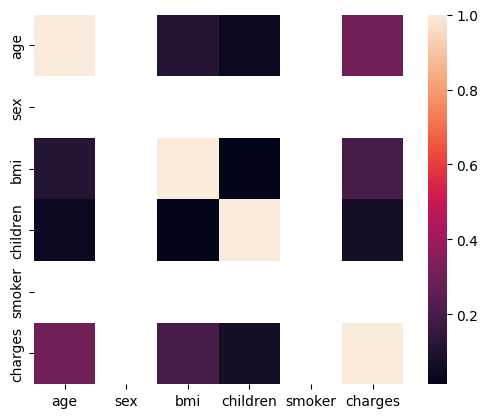

In [15]:
sns.heatmap(data.corr(), square = True)

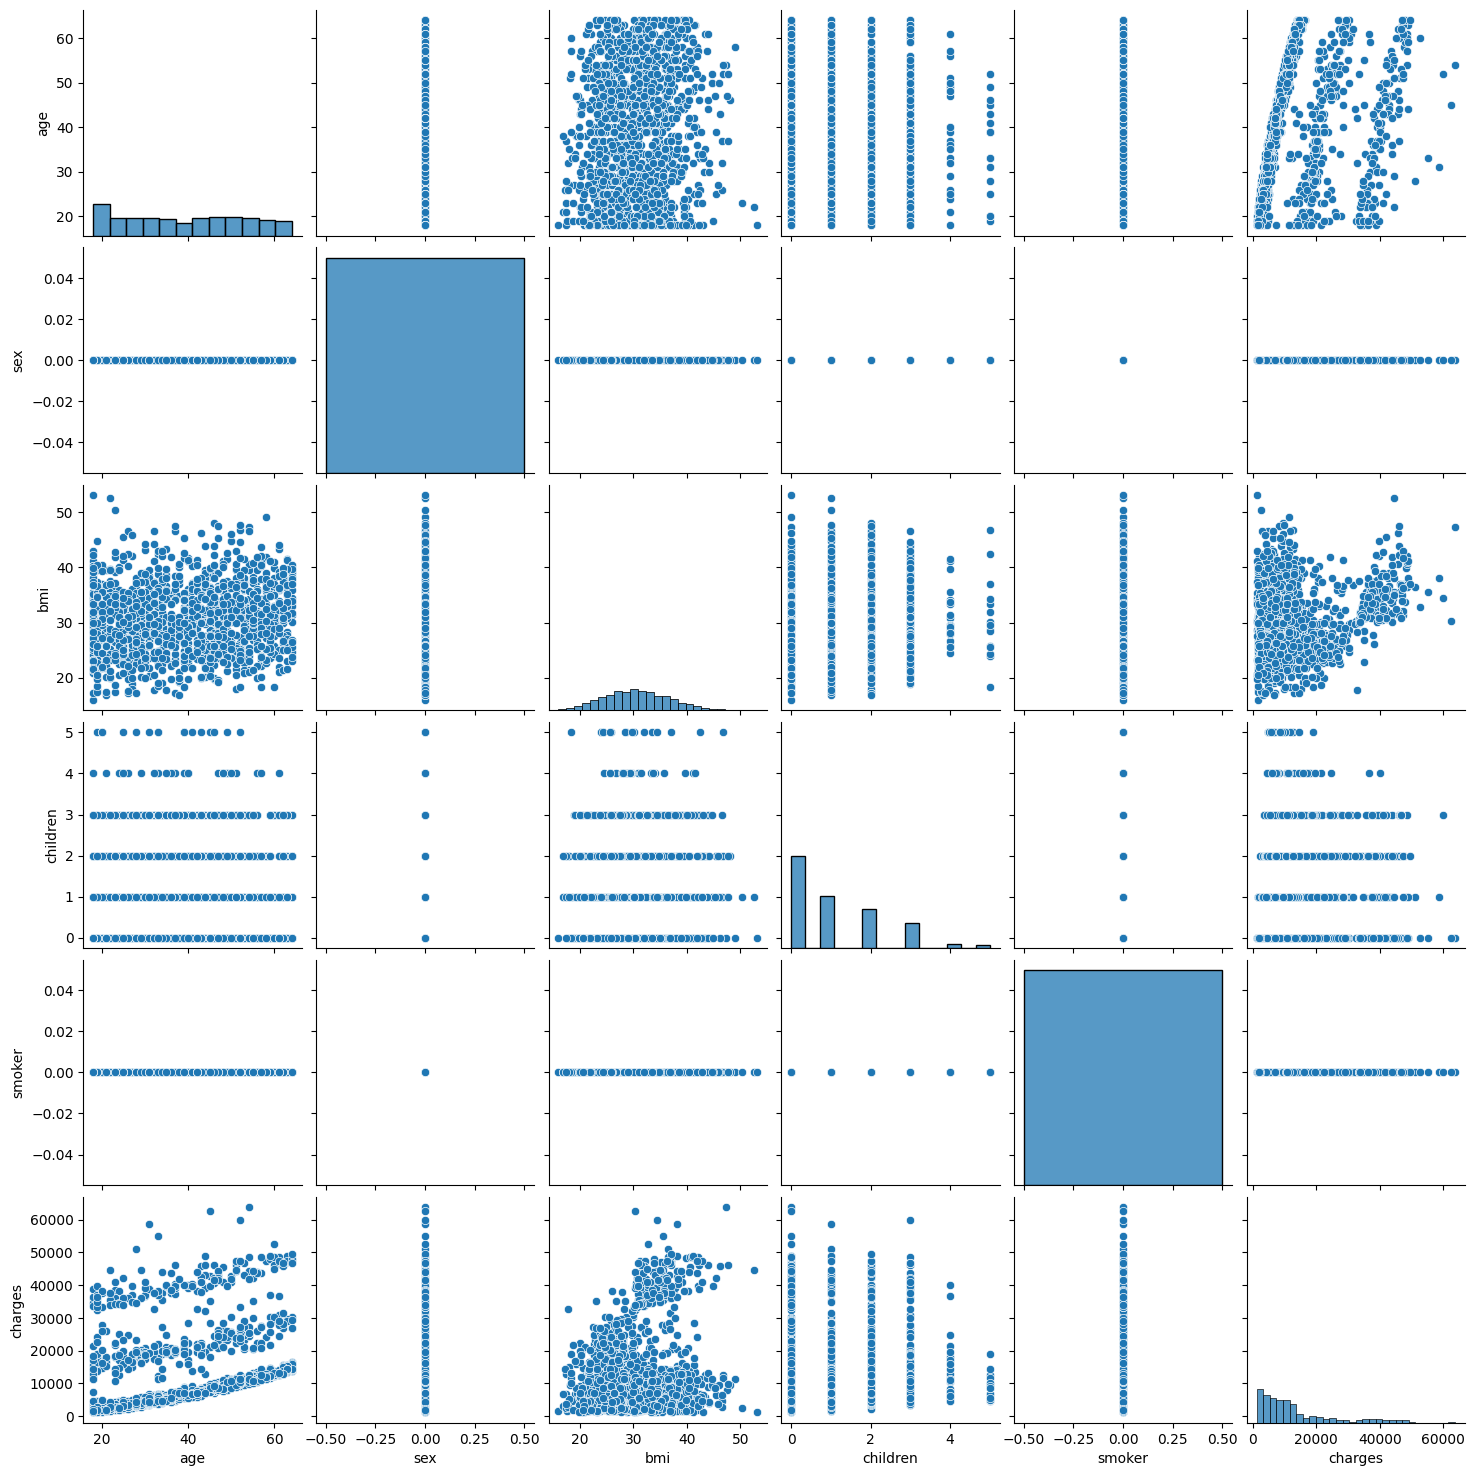

In [16]:
sns.pairplot(data)

In [17]:
y = data.charges.values
X = data.drop(['charges'], axis = 1)  

In [19]:
rf_reg = RandomForestRegressor(max_features = 'auto', bootstrap = True, random_state = None)

ada_reg = AdaBoostRegressor()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

# Predict random forest Regressor

In [25]:
rf_reg.fit(X_train, y_train)
predtrainRF = rf_reg.predict(X_train)     # Prediction for train data
predtestRF = rf_reg.predict(X_test)       # Prediction for test data

ValueError: could not convert string to float: 'southeast'

In [26]:
print("R2-score on train data:", r2_score(y_train,predtrainRF))
print("R2-score on test data:", r2_score(y_test, predtestRF))

NameError: name 'predtrainRF' is not defined

In [27]:
ada_reg.fit(X_train, y_train)
predtrainAda = ada_reg.predict(X_train)
predtestAda = ada_reg.predict(X_test)
print("R2-score on train data:",r2_score(y_train, predtrainAda))
print("R2-score on test data:",r2_score(y_test, predtestAda))

ValueError: could not convert string to float: 'northeast'

In [28]:
X_newtrain = sm.add_constant(X_train)
ols_train = sm.OLS(y_train, X_newtrain)
ols_train_new = ols_train.fit()
print(ols_train_new.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
dtype: object. The data was
[39722.7462 22412.6485  1720.3537 ... 13405.3903  7152.6714  9620.3307]
and
       const  age  sex     bmi  children  smoker     region
1156    1.0   19    0  44.880         0       0  southeast
98      1.0   56    0  19.950         0       0  northeast
1283    1.0   18    0  30.030         1       0  southeast
167     1.0   32    0  33.155         3       0  northwest
369     1.0   18    0  30.400         3       0  northeast
...     ...  ...  ...     ...       ...     ...        ...
410     1.0   19    0  17.480         0       0  northwest
1059    1.0   32    0  33.820         1       0  northwest
170     1.0   63    0  41.470         0       0  southeast
239     1.0   44    0  38.060         1       0  southeast
357     1.0   47    0  29.830         3       0  northwest

[1070 rows x 7 columns]
before. After,
[39722.7462 22412.6485  1720.3537 ... 13405.3903  7152.6714  9620.3307]
[[1.0 19 0 ... 0 0 'southeast']
 [1.0 56 0 ... 0 0 'northeast']
 [1.0 18 0 ... 1 0 'southeast']
 ...
 [1.0 63 0 ... 0 0 'southeast']
 [1.0 44 0 ... 1 0 'southeast']
 [1.0 47 0 ... 3 0 'northwest']].